In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('data.csv')

Data Exploring

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [11]:
df.shape

(148, 7)

In [12]:
 df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [17]:
def rating(x):
    return float(x[0:3])

In [18]:
rating(	'4.1/5')

4.1

In [19]:
df['rate']=df['rate'].apply(lambda x:rating(x))

In [20]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [22]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

#Type of resturants

Text(0.5, 0, 'types of resturant')

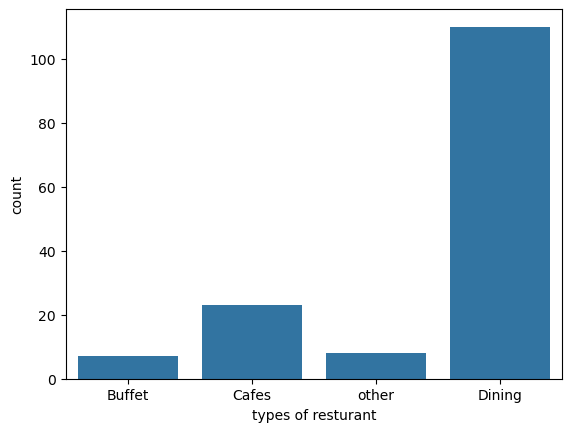

In [27]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('types of resturant')

#Conclusion-Mejority of the resturants are dinning

Text(0, 0.5, 'Votes')

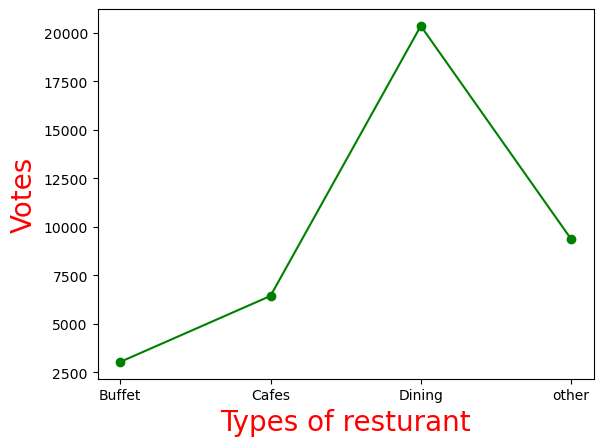

In [28]:
grp_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grp_data})
plt.plot(result,color='green',marker='o')
plt.xlabel('Types of resturant',c='red',size=20)
plt.ylabel('Votes',c='red',size=20)

conclusion:-Dinning restrants has recived max votes

Text(0, 0.5, ' no  of ratings')

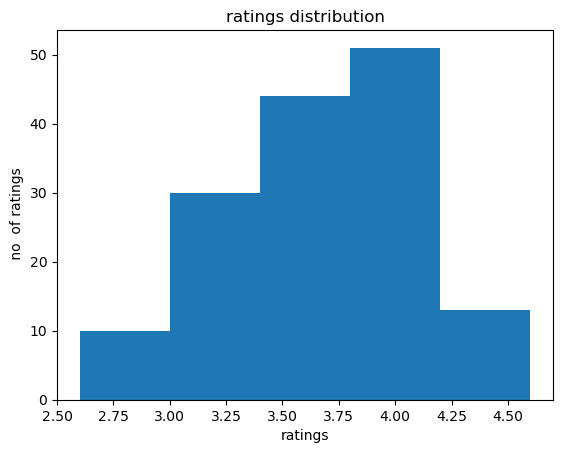

In [35]:
plt.hist(df['rate'],bins=5)
plt.title('ratings distribution')
plt.xlabel('ratings')
plt.ylabel(' no  of ratings')

conclusion-The majority resturants recived ratings from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

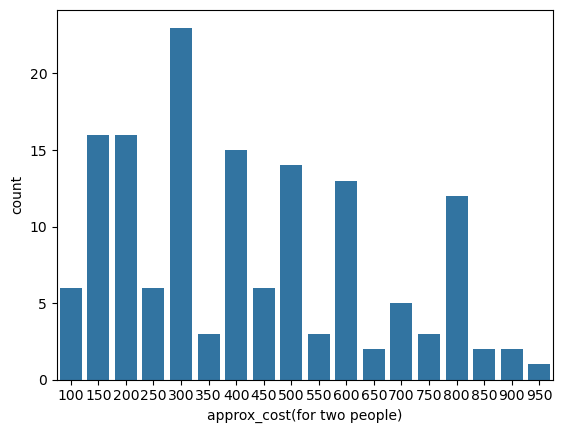

In [41]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

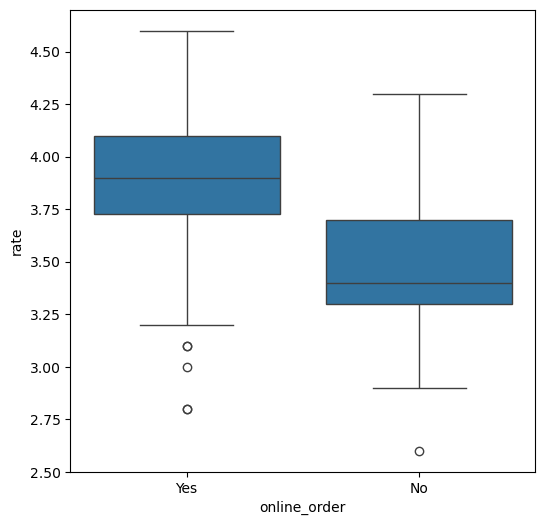

In [42]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xalbel'

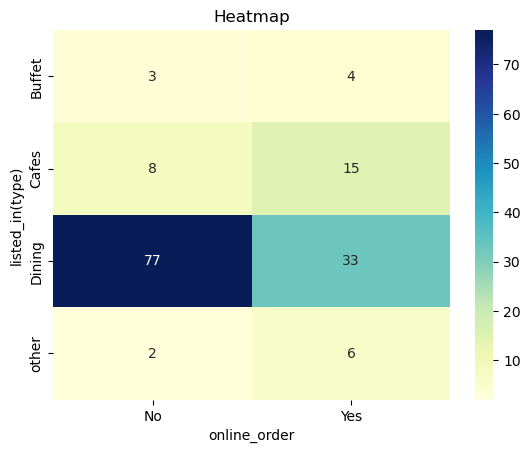

In [46]:
 pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xalbel('Online Order')
plt.ylabel('Listed IN (Type)')
plt.show()

Conclusion-Dining restruants primarily accept offline orders,wheresas cafes primarily receive online orders.This suggests that clients prefers orders in  person at restruant,but prefer online ordering at cafes.